## Data Analysis and Model Building on the Synthetic MonkeyPox Dataset from BJM

TODO:
* (Better) Exploratory Data Analysis
* Dimensionality Reduction
* Feature Selection
* Clustering
* Manipulation of Parameters:
    * Test/Train Split:
        - Try other train/test split ratios
    * Random Forest:
        - IDK pero feel ko siguro pwede pa ma-improve?
    * Bagging:
        - Using different base estimators/parameters (see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
    * AdaBoost:
        - Using different base estimators/parameters (see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
* SMOTE
    - Currently, may class imbalance sa MonkeyPox kaya kung bakit pangit ng performance ng mga models, kahit yung mga ensemble models.
    
* Other things to consider
    - Use correlation AND focus on the variable Systemic Illness
    - One hot encode systemic illness and correlate to different features

In [ ]:
df_1 = _deepnote_execute_sql('SELECT * FROM \'MonkeypoxDataset.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative
24999,P24999,Swollen Lymph Nodes,False,False,True,False,False,True,True,False,Positive
25000,None,None,None,None,None,None,None,None,None,None,None


In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Read csv file
data = pd.read_csv("MonkeypoxDataset.csv")

In [3]:
# Checks for any missing values

data.isnull().sum()

Patient_ID                        2
Systemic Illness                  2
Rectal Pain                       2
Sore Throat                       2
Penile Oedema                     2
Oral Lesions                      2
Solitary Lesion                   2
Swollen Tonsils                   2
HIV Infection                     2
Sexually Transmitted Infection    2
MonkeyPox                         1
dtype: int64

In [4]:
# Drop rows with missing values
data = data.dropna()

# Display data
data

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


### Exploratory Data Analysis

- TO DO: Separate frequencies for "with monkeypox" and "without monkeypox"

Mode:  0    Fever
dtype: object


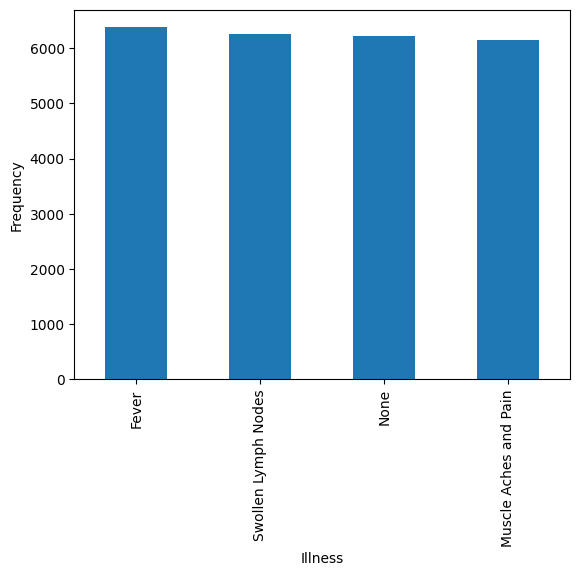

In [ ]:
# Systemic Illness
fig, ax = plt.subplots()
data["Systemic Illness"].value_counts().plot(ax=ax, kind="bar", xlabel="Illness", ylabel="Frequency")
print("Mode: ", data["Systemic Illness"].mode())
plt.show()

Mode:  0    False
dtype: object


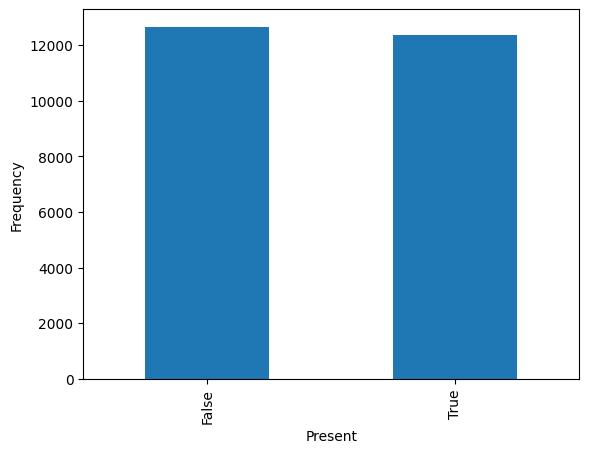

In [ ]:
# RECTAL PAIN
fig, ax = plt.subplots()
data["Rectal Pain"].value_counts().plot(ax=ax, kind="bar", xlabel="Present", ylabel="Frequency")
print("Mode: ", data["Rectal Pain"].mode())
plt.show()

Mode:  0    True
dtype: object


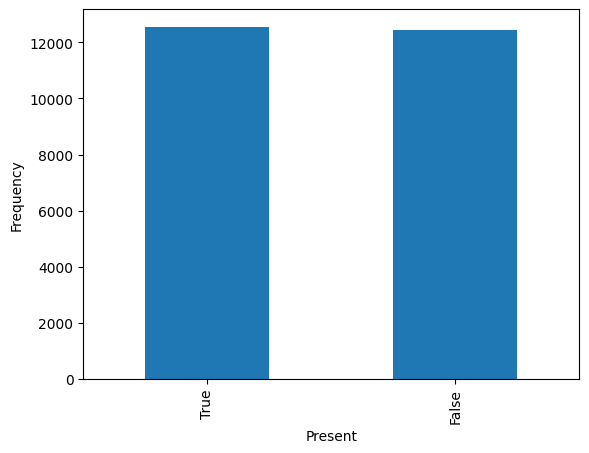

In [ ]:
# Sore Throat
fig, ax = plt.subplots()
data["Sore Throat"].value_counts().plot(ax=ax, kind="bar", xlabel="Present", ylabel="Frequency")
print("Mode: ", data["Sore Throat"].mode())
plt.show()

Mode:  0    True
dtype: object


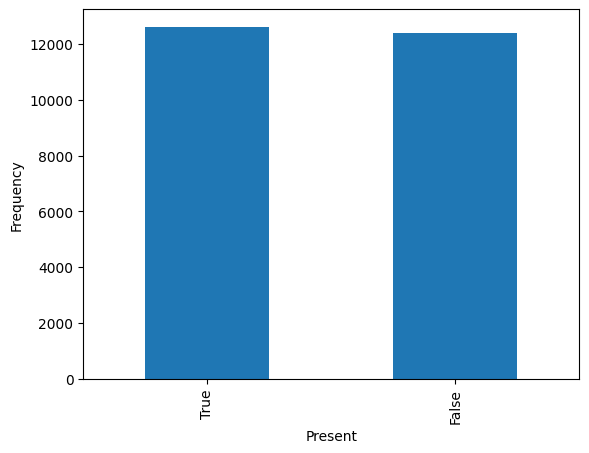

In [ ]:
# Penile Oedema
fig, ax = plt.subplots()
data["Penile Oedema"].value_counts().plot(ax=ax, kind="bar", xlabel="Present", ylabel="Frequency")
print("Mode: ", data["Penile Oedema"].mode())
plt.show()

Mode:  0    False
dtype: object


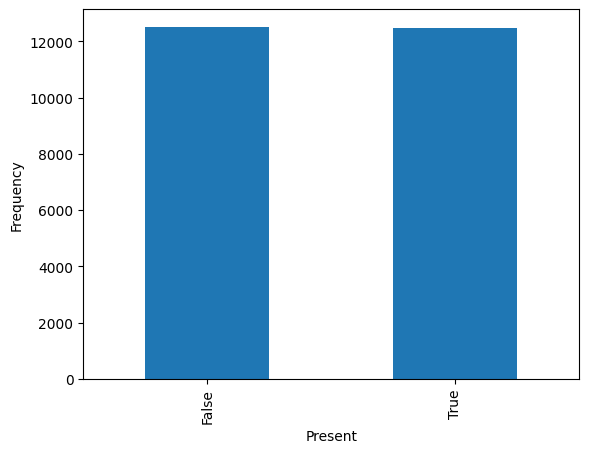

In [ ]:
# Oral Lesions
fig, ax = plt.subplots()
data["Oral Lesions"].value_counts().plot(ax=ax, kind="bar", xlabel="Present", ylabel="Frequency")
print("Mode: ", data["Oral Lesions"].mode())
plt.show()

Mode:  0    True
dtype: object


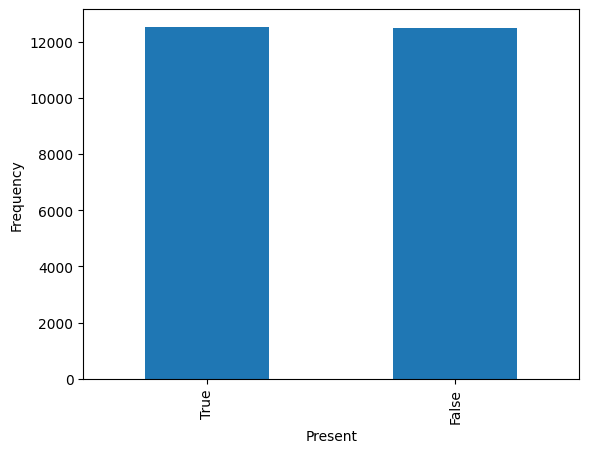

In [ ]:
# Solitary Lesion
fig, ax = plt.subplots()
data["Solitary Lesion"].value_counts().plot(ax=ax, kind="bar", xlabel="Present", ylabel="Frequency")
print("Mode: ", data["Solitary Lesion"].mode())
plt.show()

Mode:  0    True
dtype: object


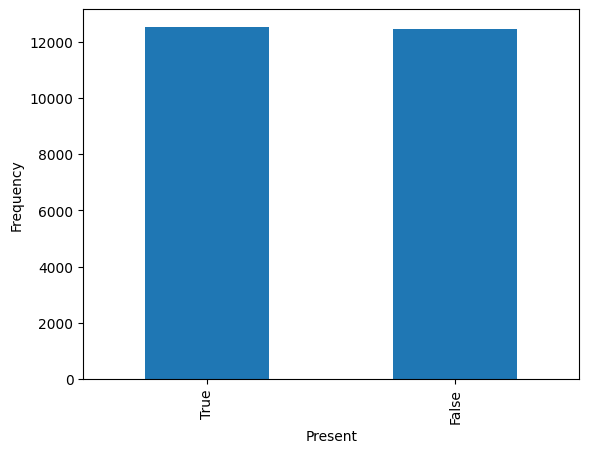

In [ ]:
# Swollen Tonsils
fig, ax = plt.subplots()
data["Swollen Tonsils"].value_counts().plot(ax=ax, kind="bar", xlabel="Present", ylabel="Frequency")
print("Mode: ", data["Swollen Tonsils"].mode())
plt.show()

Mode:  0    True
dtype: object


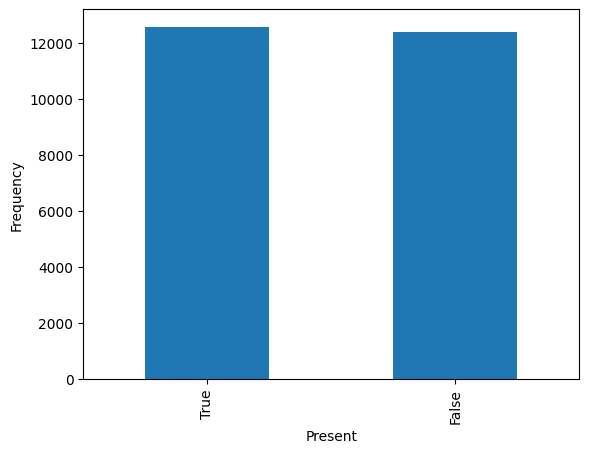

In [ ]:
# HIV Infection
fig, ax = plt.subplots()
data["HIV Infection"].value_counts().plot(ax=ax, kind="bar", xlabel="Present", ylabel="Frequency")
print("Mode: ", data["HIV Infection"].mode())
plt.show()

Mode:  0    False
dtype: object


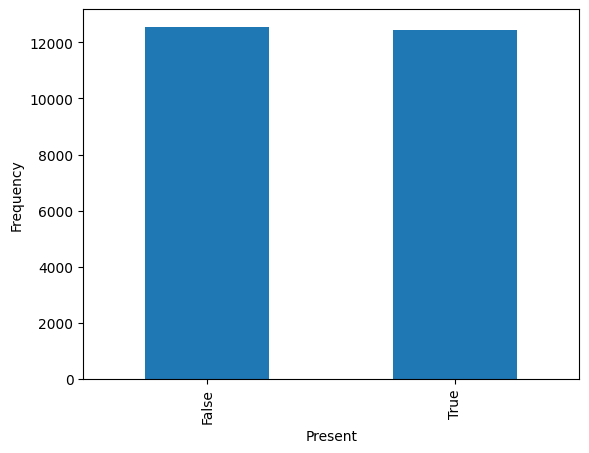

In [ ]:
# Sexually Transmitted Infection
fig, ax = plt.subplots()
data["Sexually Transmitted Infection"].value_counts().plot(ax=ax, kind="bar", xlabel="Present", ylabel="Frequency")
print("Mode: ", data["Sexually Transmitted Infection"].mode())
plt.show()

Mode:  0    Positive
dtype: object


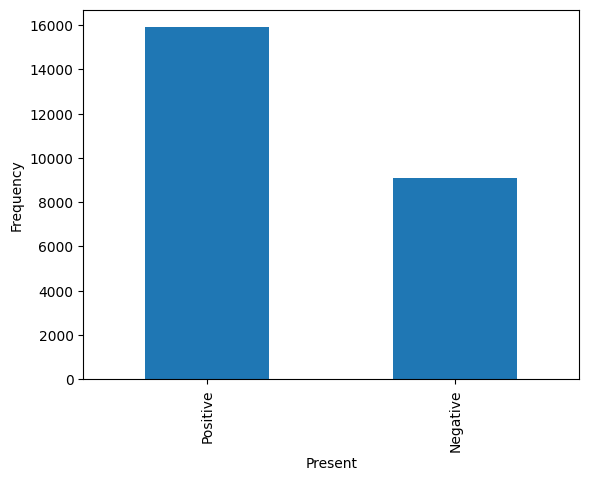

In [ ]:
# MonkeyPox
fig, ax = plt.subplots()
data["MonkeyPox"].value_counts().plot(ax=ax, kind="bar", xlabel="Present", ylabel="Frequency")
print("Mode: ", data["MonkeyPox"].mode())
plt.show()

In [ ]:
# Replace string boolean values to numerical boolean values
data = data.replace(["Positive", "Negative", True, False], [1,0,1,0])
data.head(10)

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,0,1,1,1,0,1,0,0,0
1,P1,Fever,1,0,1,1,0,0,1,0,1
2,P2,Fever,0,1,1,0,0,0,1,0,1
3,P3,None,1,0,0,0,1,1,1,0,1
4,P4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1
5,P5,Swollen Lymph Nodes,0,1,0,0,0,0,0,0,0
6,P6,Fever,0,1,0,0,0,0,1,0,1
7,P7,Fever,1,1,0,1,1,1,0,0,1
8,P8,Muscle Aches and Pain,0,1,1,1,0,0,0,0,1
9,P9,Fever,0,0,1,1,1,0,1,0,0


In [ ]:
# One hot encode "Systemic Illness"
data = pd.get_dummies(data, columns=['Systemic Illness'])
data

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_None,Systemic Illness_Swollen Lymph Nodes
0,P0,0,1,1,1,0,1,0,0,0,0,0,1,0
1,P1,1,0,1,1,0,0,1,0,1,1,0,0,0
2,P2,0,1,1,0,0,0,1,0,1,1,0,0,0
3,P3,1,0,0,0,1,1,1,0,1,0,0,1,0
4,P4,1,1,1,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,1,1,0,1,1,0,0,1,1,0,0,1,0
24996,P24996,0,1,1,0,1,1,1,1,1,1,0,0,0
24997,P24997,1,1,0,0,1,1,0,0,1,0,0,1,0
24998,P24998,0,1,0,1,1,1,0,0,0,0,0,0,1


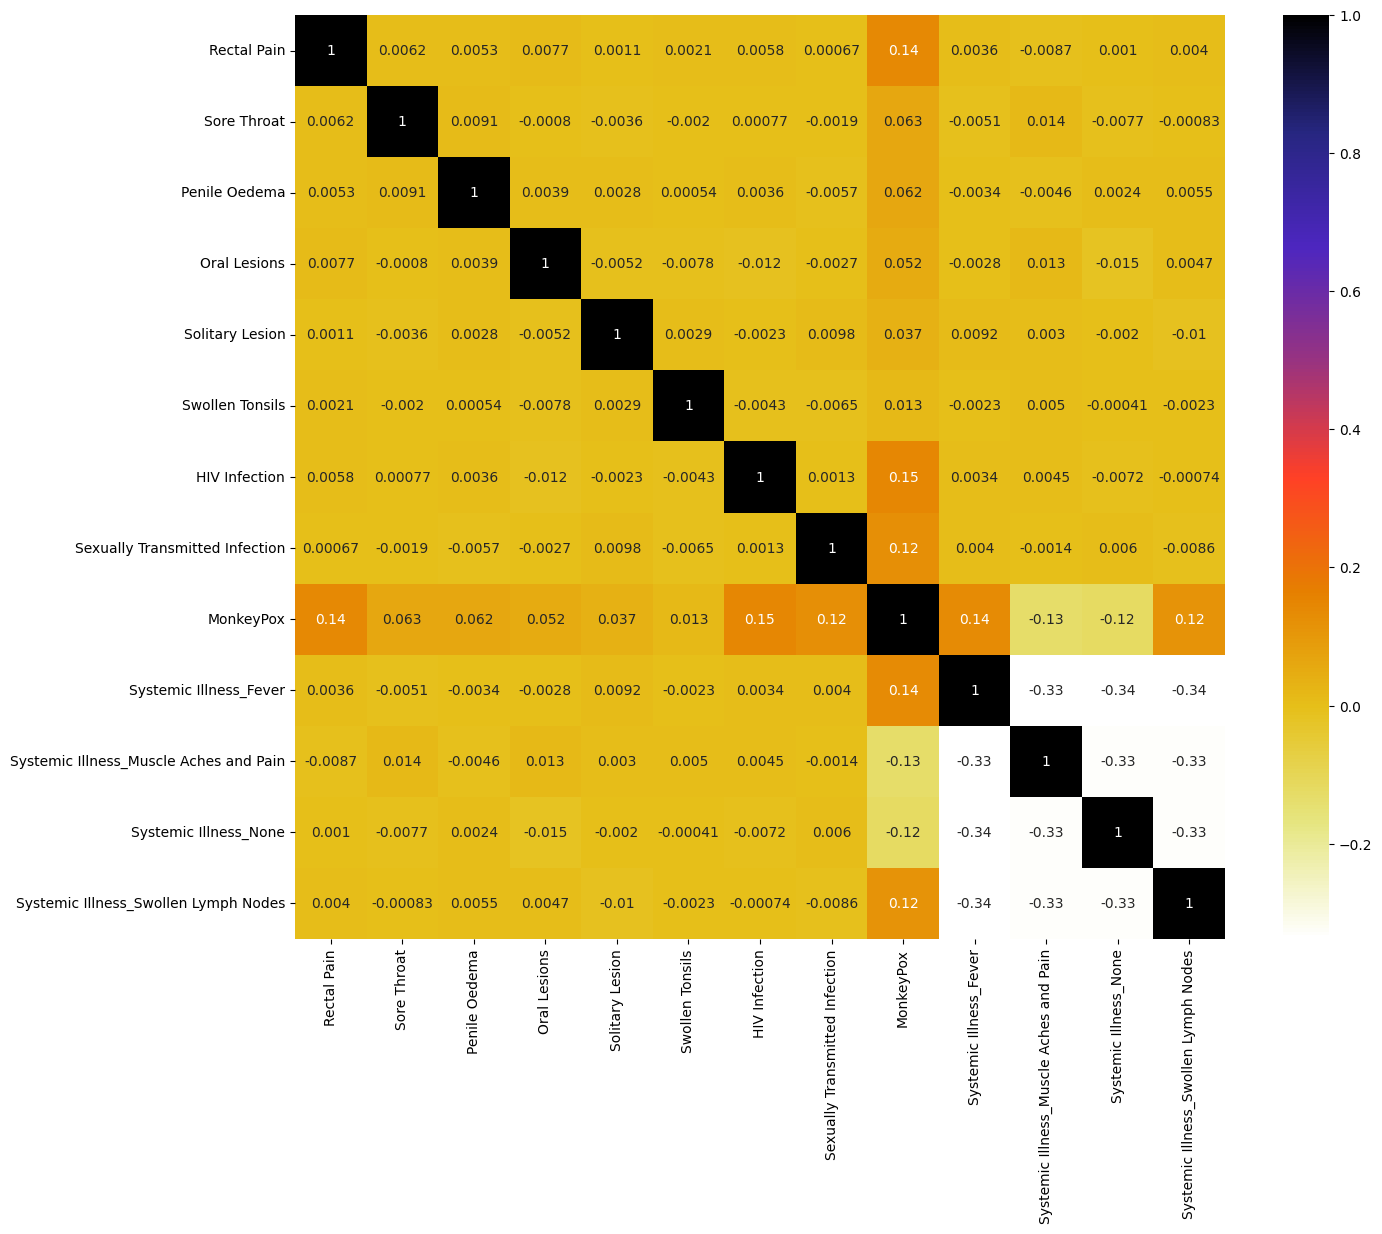

In [ ]:
# Use correlation matrix
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(method='kendall'), cmap=plt.cm.CMRmap_r, annot = True)
plt.show()

### Clustering

In [ ]:
# !pip install numpy==1.19.5
# !pip install numba==0.54.0

In [ ]:
# Import pyclustertend
# !pip install pyclustertend
# print(numpy.__version__)
# !pip list | grep numpy
# !pip uninstall -y numpy

# !pip install numpy==1.20

# from pyclustertend import vat 

# Duplicate original dataset
# data_clustering = data

# Convert to numerical values
# for col in data_clustering.columns:
#     unique_values = data_clustering[col].unique()
#     mapping = {value: 1 if value == unique_values[0] else 0 for value in unique_values}
#     data_clustering[col] = data[col].map(mapping)

# vat(data_clustering.values)




In [ ]:
# Some code to convert dataset data to categorical and numerical

# Convert to categorical values
for col in data.columns:
    data[col] = data[col].astype("category")

# Convert to numerical values
# for col in data.columns:
#     unique_values = data[col].unique()
#     mapping = {value: 1 if value == unique_values[0] else 0 for value in unique_values}
#     data[col] = data[col].map(mapping)

# Check column types
data.dtypes

Patient_ID                                category
Rectal Pain                               category
Sore Throat                               category
Penile Oedema                             category
Oral Lesions                              category
Solitary Lesion                           category
Swollen Tonsils                           category
HIV Infection                             category
Sexually Transmitted Infection            category
MonkeyPox                                 category
Systemic Illness_Fever                    category
Systemic Illness_Muscle Aches and Pain    category
Systemic Illness_None                     category
Systemic Illness_Swollen Lymph Nodes      category
dtype: object

### Association Rule Mining using the Apriori Algorithm

In [ ]:
!pip install apyori
from apyori import apriori # For association rule mining

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=554355ebfc31d79c3b497a5a6d6462cab69c471b5efb7904bb490d071a880f32
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Helper method to convert true or false values to categorical "[symptom]" or "no [symptom]"
# because apriori library doesn't work well with boolean values
# IMPORTANT: DO NOT RUN THIS BEFORE RUNNING SUKPERVISED LEANING MODELS
def convert_binary_to_categorical(value, column_name):
    if value:
        return column_name.replace("is_", "")
    else:
        return "No " + column_name.replace("is_", "")

# Create temporary dataset to be modified for apriori
data_apriori = data.copy()

# Iterate over columns to replace true or false values with categorical forms
for column in data_apriori.iloc[:, 2:11].columns:
    data_apriori[column] = data_apriori[column].map(lambda x: convert_binary_to_categorical(x, column))

# Check dataset if values get converted to categorical forms as intended
data_apriori

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_None,Systemic Illness_Swollen Lymph Nodes
0,P0,0,Sore Throat,Penile Oedema,Oral Lesions,No Solitary Lesion,Swollen Tonsils,No HIV Infection,No Sexually Transmitted Infection,No MonkeyPox,No Systemic Illness_Fever,0,1,0
1,P1,1,No Sore Throat,Penile Oedema,Oral Lesions,No Solitary Lesion,No Swollen Tonsils,HIV Infection,No Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,0,0,0
2,P2,0,Sore Throat,Penile Oedema,No Oral Lesions,No Solitary Lesion,No Swollen Tonsils,HIV Infection,No Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,0,0,0
3,P3,1,No Sore Throat,No Penile Oedema,No Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,No Sexually Transmitted Infection,MonkeyPox,No Systemic Illness_Fever,0,1,0
4,P4,1,Sore Throat,Penile Oedema,No Oral Lesions,No Solitary Lesion,Swollen Tonsils,HIV Infection,No Sexually Transmitted Infection,MonkeyPox,No Systemic Illness_Fever,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,1,Sore Throat,No Penile Oedema,Oral Lesions,Solitary Lesion,No Swollen Tonsils,No HIV Infection,Sexually Transmitted Infection,MonkeyPox,No Systemic Illness_Fever,0,1,0
24996,P24996,0,Sore Throat,Penile Oedema,No Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,0,0,0
24997,P24997,1,Sore Throat,No Penile Oedema,No Oral Lesions,Solitary Lesion,Swollen Tonsils,No HIV Infection,No Sexually Transmitted Infection,MonkeyPox,No Systemic Illness_Fever,0,1,0
24998,P24998,0,Sore Throat,No Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,No HIV Infection,No Sexually Transmitted Infection,No MonkeyPox,No Systemic Illness_Fever,0,0,1


In [ ]:
# Using apyori library. Parameter values can be adjusted accordingly
rules = apriori(data_apriori.values.tolist(), min_support=0.2, min_confidence=0.5, min_lift=1.0, min_length=2)

# Printing rules that result to MonkeyPox in a more readable way
for rule in rules:
    # print(rule)
    antecedents = ', '.join([str(item) for item in rule.ordered_statistics[0].items_base])
    consequents = ', '.join([str(item) for item in rule.ordered_statistics[0].items_add])
    support = rule.support
    confidence = rule.ordered_statistics[0].confidence
    lift = rule.ordered_statistics[0].lift
    if (consequents == "MonkeyPox"):
        print(f"Rule: {antecedents} -> {consequents}")
        print(f"Support: {support}")
        print(f"Confidence: {confidence}")
        print(f"Lift: {lift}")
        print("\n")


TypeError: '<' not supported between instances of 'int' and 'str'

### Splitting the dataset into training and testing data

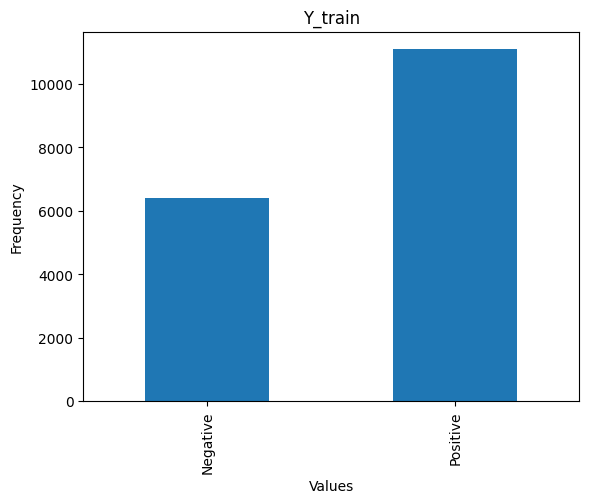

In [5]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing data into 60/40 ratio with random state 50
X = data.iloc[:, 2:9].values
Y = data.iloc[:, 10].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

series = pd.Series(Y_train)
counts = series.value_counts()
counts = counts.sort_index()
counts.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Y_train')
plt.show()

In [6]:
# Importing modules
from sklearn import tree # Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.ensemble import BaggingClassifier # Bagging Classifier
from sklearn.ensemble import AdaBoostClassifier #AdaBoost Classifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
 ) # Model Performance Metrics

### Decision Tree Model

Decision Tree
Confusion Matrix:
 [[ 686 2002]
 [ 597 4215]]
Accuracy: 0.6534666666666666
              precision    recall  f1-score   support

    Negative       0.53      0.26      0.35      2688
    Positive       0.68      0.88      0.76      4812

    accuracy                           0.65      7500
   macro avg       0.61      0.57      0.55      7500
weighted avg       0.63      0.65      0.61      7500



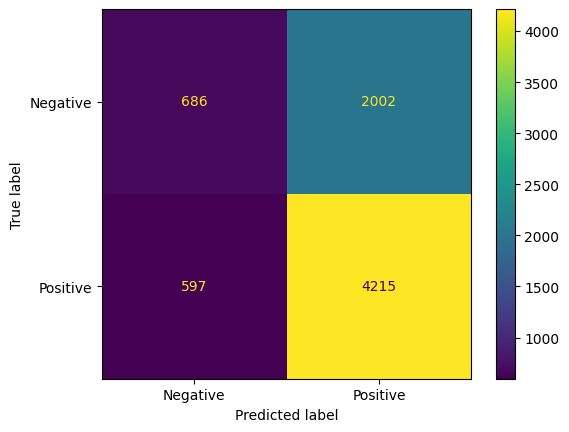

In [7]:
# Create a Decision tree classifier
tree_classifier = tree.DecisionTreeClassifier()

# Train the model  using training sets
tree_classifier = tree_classifier.fit(X_train, Y_train)

# Predict the response for the test dataset
Y_pred = tree_classifier.predict(X_test)

# Evaluating Model Performance
print("Decision Tree")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### Naive Bayes Model

Naive Bayes
Confusion Matrix:
 [[ 633 2055]
 [ 523 4289]]
Accuracy: 0.6562666666666667
              precision    recall  f1-score   support

    Negative       0.55      0.24      0.33      2688
    Positive       0.68      0.89      0.77      4812

    accuracy                           0.66      7500
   macro avg       0.61      0.56      0.55      7500
weighted avg       0.63      0.66      0.61      7500



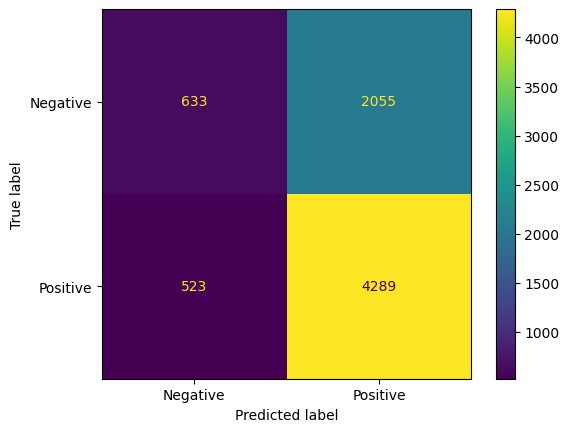

In [8]:
# Create a Gaussian Classifier
gaussian_classifier = GaussianNB()

# Train the model using the training sets
gaussian_classifier.fit(X_train, Y_train)

# Predict the response for test dataset
Y_pred = gaussian_classifier.predict(X_test)

# Evaluating model performance
print("Naive Bayes")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### Random Forest

Random Forest
Confusion Matrix:
 [[ 659 2029]
 [ 569 4243]]
Accuracy: 0.6536
              precision    recall  f1-score   support

    Negative       0.54      0.25      0.34      2688
    Positive       0.68      0.88      0.77      4812

    accuracy                           0.65      7500
   macro avg       0.61      0.56      0.55      7500
weighted avg       0.63      0.65      0.61      7500



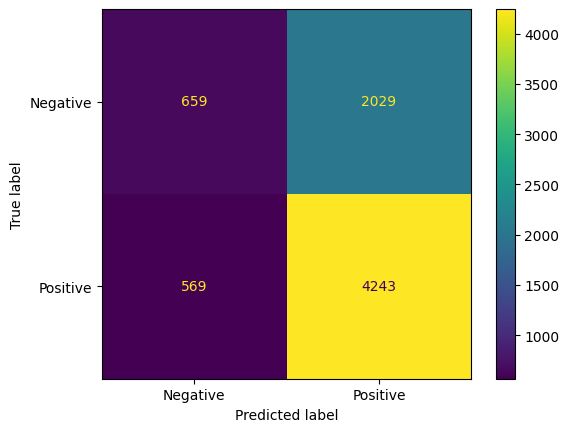

In [9]:
# Create random forest classifier
random_forest_classifier = RandomForestClassifier(random_state=50)

# Train the model using training sets 
random_forest_classifier = random_forest_classifier.fit(X_train, Y_train)

# Predict the response for test datasets
Y_pred = random_forest_classifier.predict(X_test)

# Evaluating model performance
print("Random Forest")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### Bagging

Bagging
Confusion Matrix:
 [[ 641 2047]
 [ 556 4256]]
Accuracy: 0.6529333333333334
              precision    recall  f1-score   support

    Negative       0.54      0.24      0.33      2688
    Positive       0.68      0.88      0.77      4812

    accuracy                           0.65      7500
   macro avg       0.61      0.56      0.55      7500
weighted avg       0.63      0.65      0.61      7500



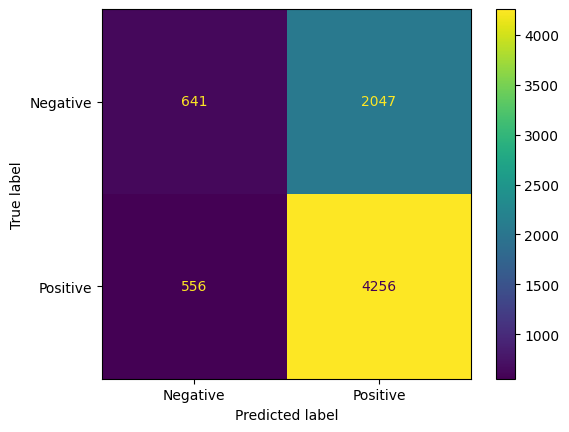

In [10]:
# Create random forest classifier
bagging_classifier = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=10, random_state=50)

# Train the model using training sets 
bagging_classifier = bagging_classifier.fit(X_train, Y_train)

# Predict the response for test datasets
Y_pred = bagging_classifier.predict(X_test)

# Evaluating model performance
print("Bagging")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### AdaBoost Classifier

AdaBoost
Confusion Matrix:
 [[ 686 2002]
 [ 597 4215]]
Accuracy: 0.6534666666666666
              precision    recall  f1-score   support

    Negative       0.53      0.26      0.35      2688
    Positive       0.68      0.88      0.76      4812

    accuracy                           0.65      7500
   macro avg       0.61      0.57      0.55      7500
weighted avg       0.63      0.65      0.61      7500



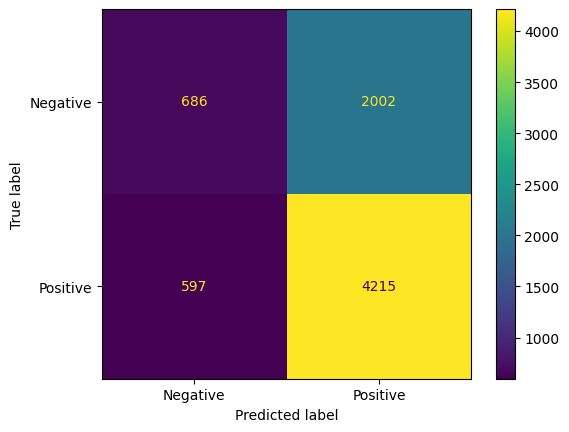

In [11]:
# Create random forest classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=100, random_state=50)

# Train the model using training sets 
adaboost_classifier = adaboost_classifier.fit(X_train, Y_train)

# Predict the response for test datasets
Y_pred = adaboost_classifier.predict(X_test)

# Evaluating model performance
print("AdaBoost")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### SMOTE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 10.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


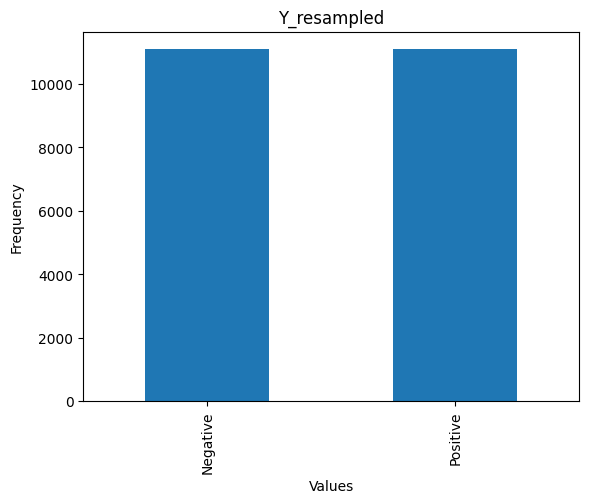

In [14]:
!pip install imblearn

# Perform SMOTE to address class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

series = pd.Series(Y_resampled)
counts = series.value_counts()
counts = counts.sort_index()
counts.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Y_resampled')
plt.show()

### Decision Tree (SMOTE)

Decision Tree (SMOTE)
Confusion Matrix:
 [[1619 1069]
 [1957 2855]]
Accuracy: 0.5965333333333334
              precision    recall  f1-score   support

    Negative       0.45      0.60      0.52      2688
    Positive       0.73      0.59      0.65      4812

    accuracy                           0.60      7500
   macro avg       0.59      0.60      0.59      7500
weighted avg       0.63      0.60      0.60      7500



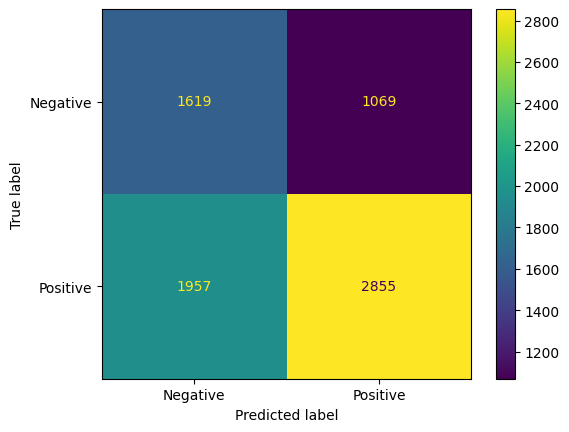

In [15]:
# Create a Decision tree classifier
tree_classifier = tree.DecisionTreeClassifier()

# Train the model  using training sets
tree_classifier = tree_classifier.fit(X_resampled, Y_resampled)

# Predict the response for the test dataset
Y_pred = tree_classifier.predict(X_test)

# Evaluating Model Performance
print("Decision Tree (SMOTE)")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### Naive Bayes Model (SMOTE)

Naive Bayes (SMOTE)
Confusion Matrix:
 [[1594 1094]
 [1890 2922]]
Accuracy: 0.6021333333333333
              precision    recall  f1-score   support

    Negative       0.46      0.59      0.52      2688
    Positive       0.73      0.61      0.66      4812

    accuracy                           0.60      7500
   macro avg       0.59      0.60      0.59      7500
weighted avg       0.63      0.60      0.61      7500



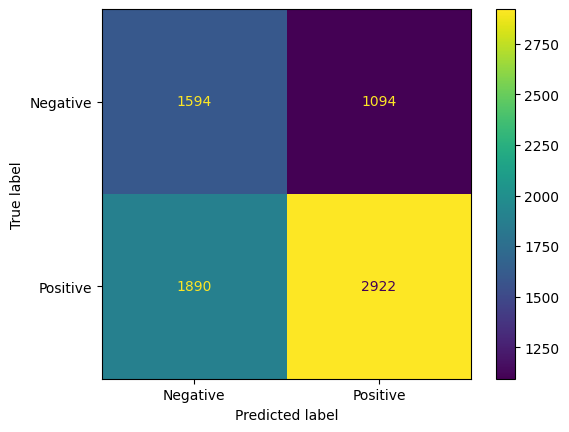

In [16]:
# Create a Gaussian Classifier
gaussian_classifier = GaussianNB()

# Train the model using the training sets
gaussian_classifier.fit(X_resampled, Y_resampled)

# Predict the response for test dataset
Y_pred = gaussian_classifier.predict(X_test)

print("Naive Bayes (SMOTE)")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### Random Forest (SMOTE)

Random Forest (SMOTE)
Confusion Matrix:
 [[1535 1153]
 [1815 2997]]
Accuracy: 0.6042666666666666
              precision    recall  f1-score   support

    Negative       0.46      0.57      0.51      2688
    Positive       0.72      0.62      0.67      4812

    accuracy                           0.60      7500
   macro avg       0.59      0.60      0.59      7500
weighted avg       0.63      0.60      0.61      7500



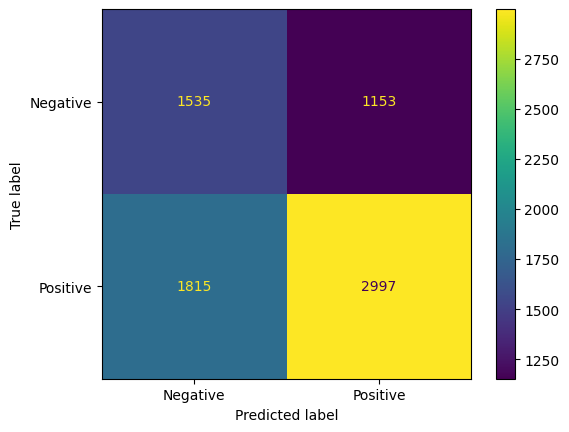

In [17]:
# Create random forest classifier
random_forest_classifier = RandomForestClassifier(random_state=50)

# Train the model using training sets 
random_forest_classifier = random_forest_classifier.fit(X_resampled, Y_resampled)

# Predict the response for test datasets
Y_pred = random_forest_classifier.predict(X_test)

print("Random Forest (SMOTE)")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### Bagging (SMOTE)

Bagging (SMOTE)
Confusion Matrix:
 [[1519 1169]
 [1789 3023]]
Accuracy: 0.6056
              precision    recall  f1-score   support

    Negative       0.46      0.57      0.51      2688
    Positive       0.72      0.63      0.67      4812

    accuracy                           0.61      7500
   macro avg       0.59      0.60      0.59      7500
weighted avg       0.63      0.61      0.61      7500



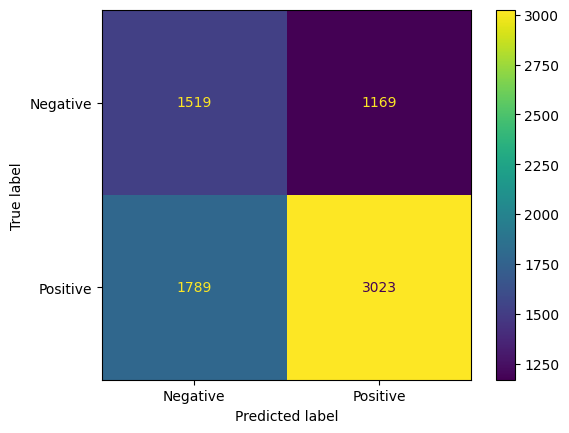

In [18]:
# Create bagging classifier
bagging_classifier = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=10, random_state=50)

# Train the model using training sets 
bagging_classifier = bagging_classifier.fit(X_resampled, Y_resampled)

# Predict the response for test datasets
Y_pred = bagging_classifier.predict(X_test)

print("Bagging (SMOTE)")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### AdaBoost (SMOTE)

AdaBoost (SMOTE)
Confusion Matrix:
 [[1597 1091]
 [1926 2886]]
Accuracy: 0.5977333333333333
              precision    recall  f1-score   support

    Negative       0.45      0.59      0.51      2688
    Positive       0.73      0.60      0.66      4812

    accuracy                           0.60      7500
   macro avg       0.59      0.60      0.59      7500
weighted avg       0.63      0.60      0.61      7500



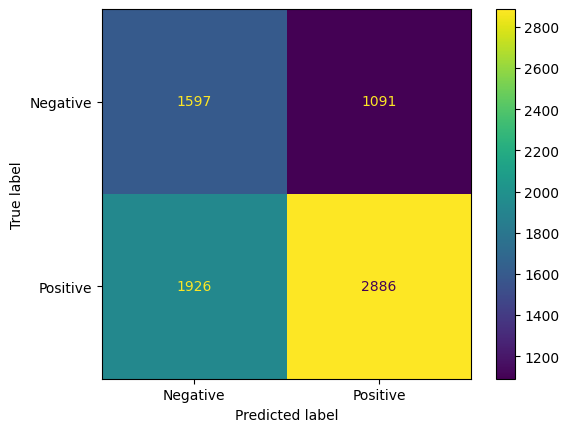

In [19]:
# Create random forest classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=100, random_state=50)

# Train the model using training sets 
adaboost_classifier = adaboost_classifier.fit(X_resampled, Y_resampled)

# Predict the response for test datasets
Y_pred = adaboost_classifier.predict(X_test)

print("AdaBoost (SMOTE)")
confusion_matrix_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=tree_classifier.classes_)
confusion_matrix_.plot()
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### Recursive Feature Elimination with Cross Validation

In [20]:
from sklearn.feature_selection import RFECV

# Using RandomForestClassifier()
# Feel free to try other models as needed by changing "estimator" parameter
rfecv = RFECV(estimator=RandomForestClassifier(), min_features_to_select=3, cv=10)
rfecv = rfecv.fit(X, Y)
# print("Ranking: ", rfecv.ranking_)
features = data.iloc[:,2:9].columns
best_features = features[rfecv.get_support()]
print(best_features)

Index(['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'HIV Infection'],
      dtype='object')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a880042-d3e0-4b94-983d-1e883fd28e58' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>